### Import Libs

In [4]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

2023-05-18 20:35:01.050986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 20:35:01.097662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 20:35:01.098820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 20:35:01.899648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### TF Basics

In [5]:
x = tf.constant([2, 3, 4])
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 4], dtype=int32)>

In [6]:
x = tf.Variable(2.0, dtype=tf.float32, name="my_variable")

In [7]:
x.assign(45.8) 
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=45.8>

In [8]:
x.assign_add(4)
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=49.8>

In [9]:
x.assign_sub(3)
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=46.8>

In [11]:
a = tf.constant([5, 3, 8])
b = tf.constant([3, -1, 2])
c = tf.add(a, b)
d = a + b

print("c:", c)
print("d:", d)

c: tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)
d: tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)


In [12]:
a = tf.constant([5, 3, 8])
b = tf.constant([3, -1, 2])
c = tf.multiply(a, b)
d = a * b

print("c:", c)
print("d:", d)

c: tf.Tensor([15 -3 16], shape=(3,), dtype=int32)
d: tf.Tensor([15 -3 16], shape=(3,), dtype=int32)


In [13]:
a = tf.constant([5, 3, 8], dtype=tf.float32)
b = tf.math.exp(a)

print("b:", b)

b: tf.Tensor([ 148.41316    20.085537 2980.958   ], shape=(3,), dtype=float32)


In [14]:
a_py = [1, 2]
b_py = [3, 4]

In [15]:
tf.add(a_py, b_py)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [16]:
a_np = np.array([1, 2])
b_np = np.array([3, 4])

In [17]:
tf.add(a_np, b_np) 

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([4, 6])>

In [19]:
a_tf = tf.constant([1, 2])
b_tf = tf.constant([3, 4])

In [20]:
tf.add(a_tf, b_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [21]:
a_tf.numpy()

array([1, 2], dtype=int32)

### Linear Regression

In [22]:
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 10

print(f"X:{X}")
print(f"Y:{Y}")

X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y:[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


In [23]:
X_test = tf.constant(range(10, 20), dtype=tf.float32)
Y_test = 2 * X_test + 10

print(f"X_test:{X_test}")
print(f"Y_test:{Y_test}")

X_test:[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Y_test:[30. 32. 34. 36. 38. 40. 42. 44. 46. 48.]


In [28]:
y_mean = Y_test.numpy().mean()

def predict_mean(X):
    y_hat = [y_mean] * len(X)
    return y_hat

Y_hat = predict_mean(X_test)

In [29]:
errors = (Y_hat - Y_test) ** 2
loss = tf.reduce_mean(errors)
loss.numpy()

33.0

In [31]:
def loss_mse(X, Y, w0, w1):
    Y_hat = w0 * X + w1
    errors = (Y_hat - Y) ** 2
    return tf.reduce_mean(errors)

def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w0, w1)
    return tape.gradient(loss, [w0, w1])

In [32]:
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

dw0, dw1 = compute_gradients(X, Y, w0, w1)
print("dw0:", dw0.numpy())
print("dw1", dw1.numpy())

dw0: -204.0
dw1 -38.0


In [33]:
STEPS = 1000
LEARNING_RATE = 0.02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"

w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

for step in range(1, STEPS + 1):
    dw0, dw1 = compute_gradients(X, Y, w0, w1)

    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))

STEP 100 - loss: 2.6615359783172607, w0: 2.483504056930542, w1: 6.968146324157715

STEP 200 - loss: 0.27448415756225586, w0: 2.1552717685699463, w1: 9.026354789733887

STEP 300 - loss: 0.02830762229859829, w0: 2.049863815307617, w1: 9.687324523925781

STEP 400 - loss: 0.002919511403888464, w0: 2.0160133838653564, w1: 9.899585723876953

STEP 500 - loss: 0.00030110636726021767, w0: 2.0051426887512207, w1: 9.967751502990723

STEP 600 - loss: 3.105617724941112e-05, w0: 2.0016515254974365, w1: 9.989643096923828

STEP 700 - loss: 3.2044197268987773e-06, w0: 2.000530481338501, w1: 9.996673583984375

STEP 800 - loss: 3.3013247957569547e-07, w0: 2.0001704692840576, w1: 9.998931884765625

STEP 900 - loss: 3.4496132172989746e-08, w0: 2.0000550746917725, w1: 9.999654769897461

STEP 1000 - loss: 3.654804459074512e-09, w0: 2.0000178813934326, w1: 9.999887466430664



In [34]:
loss = loss_mse(X_test, Y_test, w0, w1)
loss.numpy()

2.4155089e-08

### Multi-var Linear Regression

In [36]:
X = tf.constant(np.linspace(0, 2, 1000), dtype=tf.float32)
Y = X * tf.exp(-(X**2))

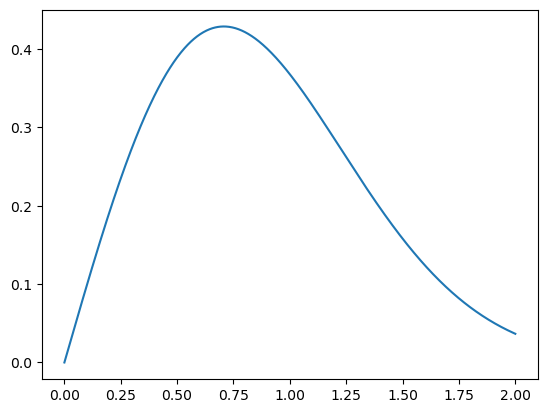

In [37]:
%matplotlib inline

plt.plot(X, Y)

In [39]:
def make_features(X):
    f1 = tf.ones_like(X)
    f2 = X
    f3 = tf.square(X)
    f4 = tf.sqrt(X)
    f5 = tf.exp(X)
    return tf.stack([f1, f2, f3, f4, f5], axis=1)

def predict(X, W):
    return tf.squeeze(X @ W, -1)

def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    errors = (Y_hat - Y) ** 2
    return tf.reduce_mean(errors)

def compute_gradients(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, W)
    return tape.gradient(loss, W)

STEP: 2000 MSE: 0.0023767948150634766


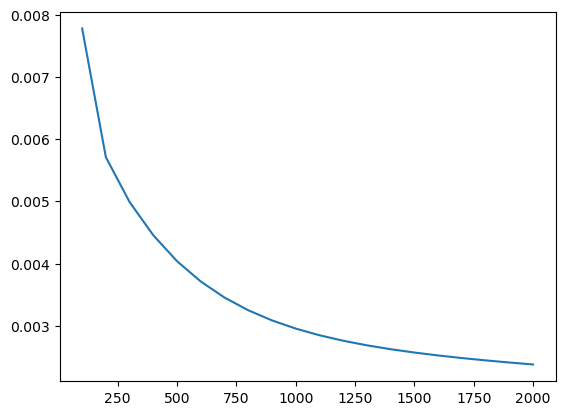

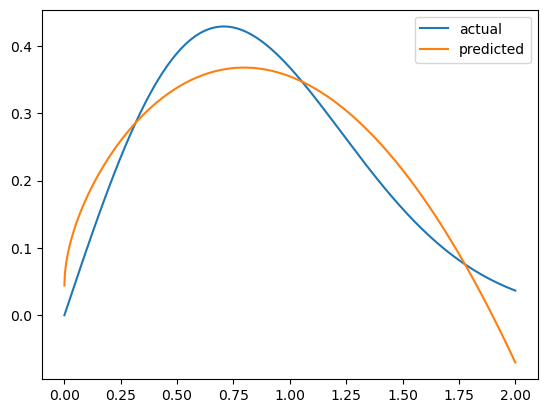

In [40]:
STEPS = 2000
LEARNING_RATE = 0.02


Xf = make_features(X)
n_weights = Xf.shape[1]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)

# For plotting
steps, losses = [], []
plt.figure()


for step in range(1, STEPS + 1):
    dW = compute_gradients(Xf, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)


print(f"STEP: {STEPS} MSE: {loss_mse(Xf, Y, W)}")

plt.figure()
plt.plot(X, Y, label="actual")
plt.plot(X, predict(Xf, W), label="predicted")
plt.legend()
